In [71]:
## Import packages
import networkx as nx
import numpy as np
from matplotlib import pyplot as pp
from axes_style import set_axes_style, set_axes_height, MinorSymLogLocator
set_axes_style()

In [72]:
## Import graph
g = nx.read_graphml("") ## insert path to graphml file

In [73]:
# Return average degree of graph

def k_avg(graph):
    k_list = [k for n, k in graph.degree()]
    k_avg = np.sum(k_list)/len(k_list)
    return k_avg

In [74]:
def network_metrics(graph):
    # Function for calculating network metrics

    n = nx.number_of_nodes(g)
    print("Number of nodes:",n)

    m = nx.number_of_edges(g)
    print("Number of edges:",m)

    c = nx.number_connected_components(g)
    print("Number of connected components:", c)

    d = nx.density(g)
    print("Density:",d)

    k = k_avg(g)
    print("Average degree:",k)

In [75]:
## creat dictionary with [key]:value being [# of sequences]:# of components containing that many sequences
component_lengths = [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]
component_bins = {i:component_lengths.count(i) for i in component_lengths}
x = list(component_bins.keys())
y = list(component_bins.values())
print(component_bins)

{845: 1, 99: 1, 45: 1, 36: 2, 31: 1, 30: 1, 29: 1, 28: 1, 24: 3, 23: 1, 21: 1, 19: 1, 18: 1, 17: 1, 16: 5, 15: 1, 14: 8, 13: 4, 12: 7, 11: 8, 10: 7, 9: 13, 8: 21, 7: 17, 6: 25, 5: 54, 4: 86, 3: 188, 2: 758, 1: 5041}


<Figure size 576x144 with 0 Axes>

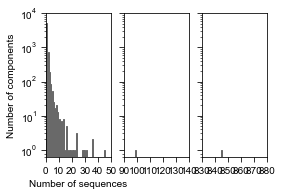

In [88]:
# plot histogram with y = number of components and x = number of sequences. Include axis breaks

figWidth = 8
figHeight = 2
fig1 = pp.figure(figsize=(figWidth, figHeight))

fig1, (ax1, ax2, ax3) = pp.subplots(1, 3, sharey=True) # put two sets of axes on same plot
fig1.subplots_adjust(hspace=0.02)  # adjust space between axes

ax1.bar(x,y, color = 'dimgrey', edgecolor='dimgrey',clip_on=True) # plot data on both axes
ax2.bar(x,y, color = 'dimgrey',edgecolor='dimgrey', clip_on=True) # plot data on both axes
ax3.bar(x,y, color = 'dimgrey',edgecolor='dimgrey', clip_on=True)
# zoom-in / limit the view to different portions of the data
ax1.set_xlim(0,50)  # most of the data
ax1.set_xticks([0,10,20,30,40,50])
ax2.set_xlim(90,140) # outliers set 1
ax2.set_xticks([90,100,110,120,130,140])
ax3.set_xlim(830,880)
ax3.set_xticks([830,840,850,860,870,880])# outliers set 2
ax1.set_yscale('symlog',linthresh=1)
ax1.yaxis.set_minor_locator(MinorSymLogLocator(1))
ax1.set_ylim(0.8,10**4)

ax1.set_ylabel("Number of components")
ax1.set_xlabel("Number of sequences")
set_axes_height(ax1, 2)
set_axes_height(ax2, 2)
set_axes_height(ax3, 2)

#fileout1 = 'component_sequence_histogram.png'
#pp.savefig(fileout1, bbox_inches="tight",dpi=300)

